In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Attributes information:

1.	Encounter ID	Unique identifier of an encounter

2.	Patient Number	Unique identifier of a patient

3.	Race	Values: Caucasian, Asian, African American, Hispanic, and other

4.	Gender	Values: male, female, and unknown/invalid

5.	Age	Grouped in 10-year intervals: [0, 10), [10, 20), ..., [90, 100)

6.	Weight	Weight in pounds

7.	Admission Type	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, new-born, and not available

8.	Discharge disposition	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

9.	Admission source	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

10.	Time in hospital	Integer number of days between admission and discharge

11.	Payer Code	Integer identifier corresponding to 23 distinct values, for example, Blue Cross\Blue Shield, Medicare, and self-pay

12.	Medical Speciality	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct
values, for example, cardiology, internal medicine, family\general practice, and
surgeon

13.	Number of Outpatient visits	Number of outpatient visits in the year preceding the encounter

14.	Number of lab procedures	Number of lab tests performed during encounter

15.	Number of procedures	Number of procedures (other than lab tests) performed during the encounter

16.	Number of Medications	Number of distinct generic names administered during the encounter

17.	Number of emergency visits	Number of emergency visits of the patient in the year preceding the encounter

18	Number of inpatient visits	Number of inpatient visits of the patient in the year preceding the encounter

19.	Diagnosis 1	The primary diagnosis (coded as first three digits of ICD9) 848 distinct values

20.	Diagnosis 2	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

21.	Diagnosis 3	Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct

22.	Number of Diagnoses	Number of diagnoses entered in the system

23.	Glucose serum test result	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,”
“normal,” and “none” if not measured

24.	A1c test result	Indicates the range of the result or if the test was not taken. Values: “>8” if the result
was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal”
if the result was less than 7%, and “none” if not measured

25.	Change of medications	Indicates if there was a change in diabetic medications (either dosage or generic
name). Values: “change” and “no change”

26.	Diabetics medication	Indicates if the there was any diabetic medication prescribed. Values: “yes” and “no”

27.	24 features for medication
	For the generic names: metformin, repaglinide, nateglinide, chlorpropamide,
glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone,
rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin,
glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone,
metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether
the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage
was increased during the encounter, “down” if the dosage was decreased, “steady” if the
dosage did not change, and “no” if the drug was not prescribed

28.	Readmitted	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than
  30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no
  record of readmission

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Data Preprocessing.

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
for i in df.columns:
    print(i,df[i].unique())
    print(i,df[i].nunique())
    print('\n')
       

encounter_id [  2278392    149190     64410 ... 443854148 443857166 443867222]
encounter_id 101766


patient_nbr [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
patient_nbr 71518


race ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
race 6


gender ['Female' 'Male' 'Unknown/Invalid']
gender 3


age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
age 10


weight ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
weight 10


admission_type_id [6 1 2 3 4 5 8 7]
admission_type_id 8


discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
discharge_disposition_id 26


admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
admission_source_id 17


time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
time_in_hospital 14


payer_code ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'D

diag_2 749


diag_3 ['?' '255' 'V27' '403' '250' 'V45' '38' '486' '996' '197' '250.6' '427'
 '627' '414' '416' '714' '428' '582' 'V43' '250.01' '263' '250.42' '276'
 '482' '401' '250.41' '585' '781' '278' '998' '568' '682' '618' '250.02'
 '305' '707' '496' '599' '715' '424' '518' '553' '794' '411' 'V42' '531'
 '511' '490' '562' '250.8' '250.7' '250.52' '784' '491' '581' '420' '8'
 '724' '730' '789' '131' '250.82' '999' '41' '493' '250.03' '753' '786'
 '529' 'E888' '425' '595' '303' '560' '711' '492' '332' '296' '438' '362'
 '250.4' '654' '244' 'V70' '737' '625' '681' '250.51' '404' 'V10' '810'
 '280' '440' '785' '588' '569' '272' '997' '250.43' '918' '584' '54' '788'
 '426' '722' '250.92' '196' '461' '535' '787' '891' '284' '458' '648'
 '780' '182' '285' '593' '413' '664' '564' '201' '356' 'V15' '292' '782'
 '473' '455' 'E932' '357' '348' '294' '250.23' '459' 'E878' '437' '733'
 '507' '525' '250.53' '397' '572' '805' '453' '331' '736' '402' '591'
 '576' '465' '533' '703' '349' '315' '6

In [7]:
# treating the special character '?' present in the given columns

In [8]:
df['race'] = df['race'].replace({'?':np.nan})
df['gender'] = df['gender'].replace({'Unknown/Invalid':np.nan})
df['weight'] = df['weight'].replace({'?':np.nan})
df['payer_code'] = df['payer_code'].replace({'?':np.nan})
df['medical_specialty'] = df['medical_specialty'].replace({'?':np.nan})
df[['diag_1','diag_2','diag_3']] = df[['diag_1','diag_2','diag_3']].replace({'?':np.nan})

In [9]:
for i in df.columns:
    print(i,df[i].unique())
    print(i,df[i].nunique())
    print('\n')

encounter_id [  2278392    149190     64410 ... 443854148 443857166 443867222]
encounter_id 101766


patient_nbr [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
patient_nbr 71518


race ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
race 5


gender ['Female' 'Male' nan]
gender 2


age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
age 10


weight [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
weight 9


admission_type_id [6 1 2 3 4 5 8 7]
admission_type_id 8


discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
discharge_disposition_id 26


admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
admission_source_id 17


time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
time_in_hospital 14


payer_code [nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'P

max_glu_serum 4


A1Cresult ['None' '>7' '>8' 'Norm']
A1Cresult 4


metformin ['No' 'Steady' 'Up' 'Down']
metformin 4


repaglinide ['No' 'Up' 'Steady' 'Down']
repaglinide 4


nateglinide ['No' 'Steady' 'Down' 'Up']
nateglinide 4


chlorpropamide ['No' 'Steady' 'Down' 'Up']
chlorpropamide 4


glimepiride ['No' 'Steady' 'Down' 'Up']
glimepiride 4


acetohexamide ['No' 'Steady']
acetohexamide 2


glipizide ['No' 'Steady' 'Up' 'Down']
glipizide 4


glyburide ['No' 'Steady' 'Up' 'Down']
glyburide 4


tolbutamide ['No' 'Steady']
tolbutamide 2


pioglitazone ['No' 'Steady' 'Up' 'Down']
pioglitazone 4


rosiglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone 4


acarbose ['No' 'Steady' 'Up' 'Down']
acarbose 4


miglitol ['No' 'Steady' 'Down' 'Up']
miglitol 4


troglitazone ['No' 'Steady']
troglitazone 2


tolazamide ['No' 'Steady' 'Up']
tolazamide 3


examide ['No']
examide 1


citoglipton ['No']
citoglipton 1


insulin ['No' 'Up' 'Steady' 'Down']
insulin 4


glyburide-metformin ['No' 'Steady

In [10]:
# checking for the missing values after treating or replacing the special characters and unknowns entries.

In [11]:
dfm = df.isnull().sum()
dfm

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [12]:
dfper = df.isnull().sum()/len(df)*100
dfper

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.002948
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [13]:
dfnull = pd.DataFrame({'Missing_Values':dfm,'Percentanges':dfper},index=df.columns)
dfnull

,Missing_Values,Percentanges
encounter_id,0,0.000000
patient_nbr,0,0.000000
race,2273,2.233555
gender,3,0.002948
age,0,0.000000
weight,98569,96.858479
admission_type_id,0,0.000000
discharge_disposition_id,0,0.000000
admission_source_id,0,0.000000
time_in_hospital,0,0.000000


In [14]:
# from the above we can infer that the weight column has 96% of missing values so we can drop the weight column. 
# and the columns such as payercode and medical_specialty has 39.5% and 49% of missing values respectively so 
# we can drop those columns too.

In [15]:
df.drop('medical_specialty',1,inplace=True)

In [16]:
df.drop(['weight','payer_code'],axis=1,inplace=True)
df.head() 

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [17]:
df['diag_1'] = df['diag_1'].fillna(df['diag_1'].mode()[0])
df['diag_1'].isnull().sum()

0

In [18]:
df['diag_2'] = df['diag_2'].fillna(df['diag_2'].mode()[0])
df['diag_2'].isnull().sum()

0

In [19]:
df['diag_3'] = df['diag_3'].fillna(df['diag_3'].mode()[0])
df['diag_3'].isnull().sum() 

0

In [20]:
df['race'] = df['race'].fillna(df['race'].mode()[0])
df['race'].isnull().sum()

0

In [21]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['gender'].isnull().sum()

0

In [22]:
#since we had less percentange of missing values in the above we imputed with the mode.

In [23]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [24]:
# all the missing values are treated.

In [25]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


There are 8 unique values ranging from 1 to 8. These 8 values correspond to : 

1	Emergency

2	Urgent

3	Elective

4	Newborn

5	Not Available

6	NULL

7	Trauma Center

8	Not Mapped

For further analysis we can merger these categories into less number of categories.

Emeregncy/Urgent/Trauma Center ---> Emergency 

Not Available/Null/Not Mapped ---> Not Available

Elective ---> Elective

New Born ---> New Born

In [26]:
df['admission_type_id']=df['admission_type_id'].replace({1:'Emergency',2:'Emergency',7:'Emergency',
                                 5:'Not Available', 6:'Not Available', 8:'Not Available',
                                 3:'Elective',4:'Newborn'})


1	 Physician Referral

2	Clinic Referral

3	HMO Referral(Health Maintenance Organization)

4	Transfer from a hospital

5	 Transfer from a Skilled Nursing Facility (SNF)

6	 Transfer from another health care facility

7	 Emergency Room

8	 Court/Law Enforcement

9	 Not Available

10	 Transfer from critial access hospital

11	Normal Delivery

12	 Premature Delivery

13	 Sick Baby

14	 Extramural Birth

15	Not Available

17	NULL

18	 Transfer From Another Home Health Agency

19	Readmission to Same Home Health Agency

20	 Not Mapped

21	Unknown/Invalid

22	 Transfer from hospital inpt/same fac reslt in a sep claim

23	 Born inside this hospital

24	 Born outside this hospital

25	 Transfer from Ambulatory Surgery Center

26	Transfer from Hospice

#### We can merge several grps over here to reduce the number of categories:

1/2/3 ---> Referral

4/5/6/10/18/19/25/26/22 ---> Transferred from another health care facility

7 ---> Emergency

9/15/17/20/21 ---> Not Available

8 --->  Court/Law Enforcement

Delivery ---> 11/12/14/13/23/24

In [27]:
df['admission_source_id']=df['admission_source_id'].replace({1:'Referral',
                                   2:'Referral',
                                   3:'Referral',
                                   4:'Transferred from another health care facility',
                                   5:'Transferred from another health care facility',
                                   6:'Transferred from another health care facility',
                                   8:'Emergency',                                    
                                   10:'Transferred from another health care facility',
                                   18:'Transferred from another health care facility',
                                   19:'Transferred from another health care facility',
                                   25:'Transferred from another health care facility',
                                   26:'Transferred from another health care facility',
                                   7:'Emergency',
                                   9:'Not Available',
                                   15:'Not Available',
                                   17:'Not Available',
                                   20:'Not Available',
                                   21:'Not Available',
                                   11:'Delivery',
                                   12:'Delivery',
                                   13:'Delivery',
                                   14:'Delivery',
                                   23:'Delivery',
                                   22:"Transferred from another health care facility",                                    
                                   24:'Delivery'})


#### discharge_disposition_id	description

1	Discharged to home

2	Discharged/transferred to another short term hospital

3	Discharged/transferred to SNF(skilled nursing facility)

4	Discharged/transferred to ICF(intermediate care facility)

5	Discharged/transferred to another type of inpatient care institution

6	Discharged/transferred to home with home health service

7	Left AMA(Against Medical Advice.)

8	Discharged/transferred to home under care of Home IV provider

9	Admitted as an inpatient to this hospital

10	Neonate discharged to another hospital for neonatal aftercare

11	Expired

12	Still patient or expected to return for outpatient services

13	Hospice / home

14	Hospice / medical facility

15	Discharged/transferred within this institution to Medicare approved swing bed

16	Discharged/transferred/referred another institution for outpatient services

17	Discharged/transferred/referred to this institution for outpatient services

18	NULL

19	Expired at home. Medicaid only, hospice.

20	Expired in a medical facility. Medicaid only, hospice.

21	Expired, place unknown. Medicaid only, hospice.

22	Discharged/transferred to another rehab fac including rehab units of a hospital .

23	Discharged/transferred to a long term care hospital.

24	Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.

25	Not Mapped

26	Unknown/Invalid

30	Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

27	Discharged/transferred to a federal health care facility.

28	Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital

29	Discharged/transferred to a Critical Access Hospital (CAH).

#### We can merge several grps over here to reduce the number of categories:

1 ---> Discharged to home

2/3/4/5/10/16/22/23/24/30/27/28/29 ---> Transferred to another medical facility

7 ---> Left AMA(Against Medical Advice.)

6/8 ---> Discharged to home with home health service

9/12/15/17 ---> Still patient/referred to this institution

11/19/20/21  ---> Expired

18/25/26 ---> Not Available

13/14 ---> Hospice

In [28]:
df['discharge_disposition_id']=df['discharge_disposition_id'].replace({1:'Discharged to home',
                                        2:'Transferred to another medical facility',
                                        3:'Transferred to another medical facility',
                                        4:'Transferred to another medical facility',
                                        5:'Transferred to another medical facility',
                                        16:'Transferred to another medical facility',
                                        22:'Transferred to another medical facility',
                                        23:'Transferred to another medical facility',
                                        24:'Transferred to another medical facility',
                                        27:'Transferred to another medical facility',
                                        28:'Transferred to another medical facility',
                                        29:'Transferred to another medical facility',
                                        30:'Transferred to another medical facility',                            
                                        6:'Discharged to home with home health service',
                                        8:'Discharged to home with home health service',
                                        7:'Left AMA',
                                        9:'Still patient/referred to this institution',
                                        12:'Still patient/referred to this institution',
                                        15:'Still patient/referred to this institution',
                                        17:'Still patient/referred to this institution',
                                        10:'Neonate discharged',
                                        11:'Expired',
                                        19:'Expired',
                                        20:'Expired',
                                        21:'Expired',
                                        13:'Hospice',
                                        14:'Hospice',
                                        18:'Not Available',
                                        25:'Not Available',
                                        26:'Not Available'})

In [29]:
df=df[df['discharge_disposition_id']!='Expired']
df=df[df['discharge_disposition_id']!='Neonate discharged']
df=df[df['discharge_disposition_id']!='Hospice']

19. Diagnosis1: The primary diagnosis(coded as first three digits of ICD9) 

20. Diagnosis2: Secondary diagnosis(coded as first three digits of ICD9)

21. Diagnosis3: Additional secondary diagnosis(coded as first three digits of ICD9)

In [30]:
df.diag_3.unique()

array(['250', '255', 'V27', '403', 'V45', '38', '486', '996', '197',
       '250.6', '427', '627', '414', '416', '714', '428', '582', 'V43',
       '250.01', '263', '250.42', '276', '482', '401', '250.41', '585',
       '781', '278', '998', '568', '682', '618', '250.02', '305', '707',
       '496', '715', '424', '518', '553', '794', '411', 'V42', '531',
       '511', '490', '562', '250.8', '599', '250.7', '250.52', '491',
       '581', '420', '8', '724', '730', '789', '131', '250.82', '999',
       '41', '493', '250.03', '753', '786', '529', 'E888', '425', '595',
       '303', '560', '711', '492', '332', '296', '438', '362', '250.4',
       '654', '244', 'V70', '737', '625', '681', '250.51', '404', 'V10',
       '810', '280', '440', '785', '588', '569', '272', '997', '250.43',
       '918', '584', '54', '788', '426', '722', '250.92', '461', '535',
       '787', '891', '284', '458', '648', '780', '182', '285', '593',
       '413', '664', '564', '201', '356', 'V15', '292', '196', '782',


In [31]:
def getCategor(x):
    if 'V' in str(x) or 'E' in str(x):
        return 'Others'
    
    x = float(x)
    
    if (x >= 390 and x <= 459) or np.floor(x) == 785:
        return 'Circulatory'
    elif (x >= 460 and x <= 519) or np.floor(x) == 786:
        return 'Respiratory'
    elif (x >= 520 and x <= 579) or np.floor(x) == 787:
        return 'Digestive'
    elif np.floor(x) == 250:
        return 'Diabetes'
    elif x >= 800 and x <= 999:
        return 'Injury'
    elif x >= 710 and x <= 739:
        return 'Musculoskeletal'
    elif (x >= 580 and x <= 629) or np.floor(x) == 788:
        return 'Genitourinary'
    elif x >= 140 and x <= 239 or np.floor(x) in [780, 781, 784] or x >= 790 and x <=799 or x>=240 and x<=249 or x>=251 and x<=279 or x>=680 and x<=709 or np.floor(x)==782 or x>=1 and x<=139:
        return 'Neoplasms'
    else:
        return 'Others'
        

In [32]:
#changing the values into categories
df['Diagnosis1'] = df['diag_1'].apply(lambda x: getCategor(x))

In [33]:
df['Diagnosis2'] = df['diag_2'].apply(lambda x: getCategor(x))

In [34]:
df['Diagnosis3'] = df['diag_3'].apply(lambda x: getCategor(x))

In [35]:
df['Diagnosis1'].unique()

array(['Diabetes', 'Neoplasms', 'Others', 'Circulatory', 'Respiratory',
       'Injury', 'Musculoskeletal', 'Digestive', 'Genitourinary'],
      dtype=object)

In [36]:
df['diag_1']

0         250.83
1            276
2            648
3              8
4            197
           ...  
101761    250.13
101762       560
101763        38
101764       996
101765       530
Name: diag_1, Length: 99337, dtype: object

In [37]:
df.drop('diag_1',1,inplace=True)

In [38]:
df.drop(['diag_2','diag_3'],1,inplace=True)

In [39]:
df.drop(['patient_nbr','encounter_id'],1,inplace=True)

In [40]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Diagnosis1', 'Diagnosis2', 'Diagnosis3'],
      dtype='object')

In [41]:
cat_data = df.select_dtypes(exclude=np.number)
cat_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,max_glu_serum,A1Cresult,metformin,repaglinide,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diagnosis1,Diagnosis2,Diagnosis3
0,Caucasian,Female,[0-10),Not Available,Not Available,Referral,None,None,No,No,...,No,No,No,No,No,No,NO,Diabetes,Neoplasms,Diabetes
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency,None,None,No,No,...,No,No,No,No,Ch,Yes,>30,Neoplasms,Diabetes,Neoplasms
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency,None,None,No,No,...,No,No,No,No,No,Yes,NO,Others,Diabetes,Others
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency,None,None,No,No,...,No,No,No,No,Ch,Yes,NO,Neoplasms,Diabetes,Circulatory
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency,None,None,No,No,...,No,No,No,No,Ch,Yes,NO,Neoplasms,Neoplasms,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),Emergency,Transferred to another medical facility,Emergency,None,>8,Steady,No,...,No,No,No,No,Ch,Yes,>30,Diabetes,Others,Circulatory
101762,AfricanAmerican,Female,[80-90),Emergency,Transferred to another medical facility,Transferred from another health care facility,None,None,No,No,...,No,No,No,No,No,Yes,NO,Digestive,Neoplasms,Digestive
101763,Caucasian,Male,[70-80),Emergency,Discharged to home,Emergency,None,None,Steady,No,...,No,No,No,No,Ch,Yes,NO,Neoplasms,Genitourinary,Others
101764,Caucasian,Female,[80-90),Emergency,Transferred to another medical facility,Emergency,None,None,No,No,...,No,No,No,No,Ch,Yes,NO,Injury,Others,Injury


In [42]:
num_data = df.select_dtypes(include=np.number)
num_data

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1,41,0,1,0,0,0,1
1,3,59,0,18,0,0,0,9
2,2,11,5,13,2,0,1,6
3,2,44,1,16,0,0,0,7
4,1,51,0,8,0,0,0,5
...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9
101762,5,33,3,18,0,0,1,9
101763,1,53,0,9,1,0,0,13
101764,10,45,2,21,0,0,1,9


# Univariate Analysis

In [43]:
# univariate analysis for categorial column

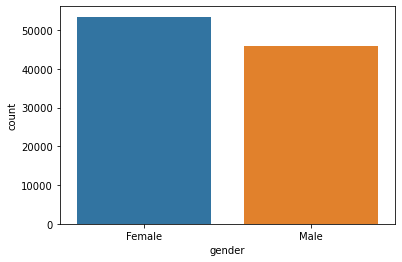

In [44]:
sns.countplot(cat_data['gender'])
plt.show()

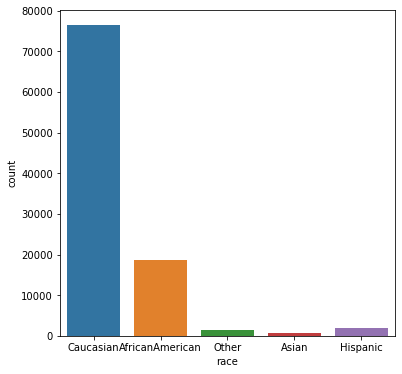

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(cat_data['race'])
plt.show()

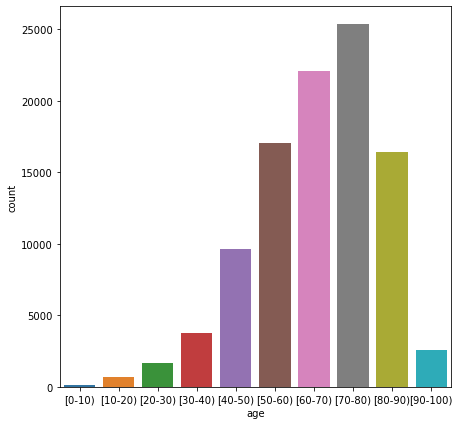

In [46]:
plt.figure(figsize=(7,7))
sns.countplot(cat_data['age'])
plt.show()

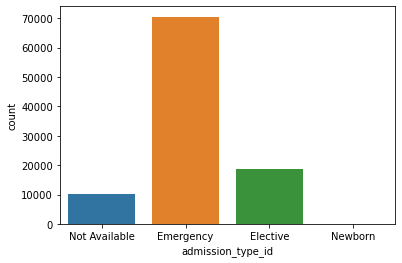

In [47]:
sns.countplot(cat_data['admission_type_id'])
plt.show()

In [48]:
cat_data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Diagnosis1', 'Diagnosis2', 'Diagnosis3'],
      dtype='object')

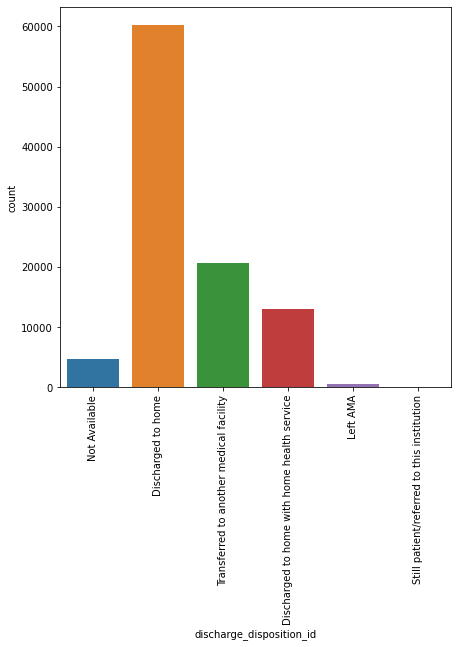

In [49]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(cat_data['discharge_disposition_id'])
plt.show()

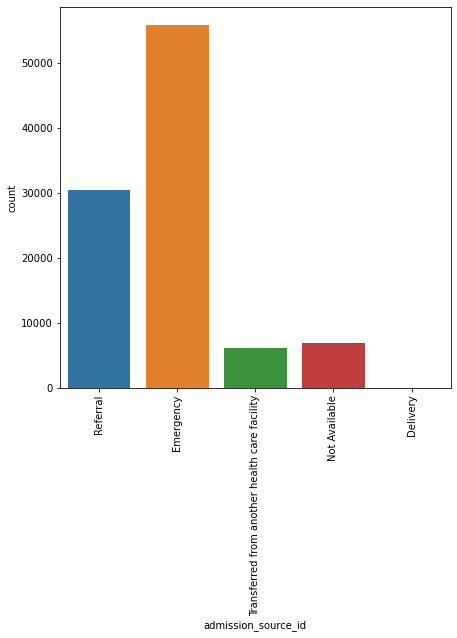

In [50]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(cat_data['admission_source_id'])
plt.show()

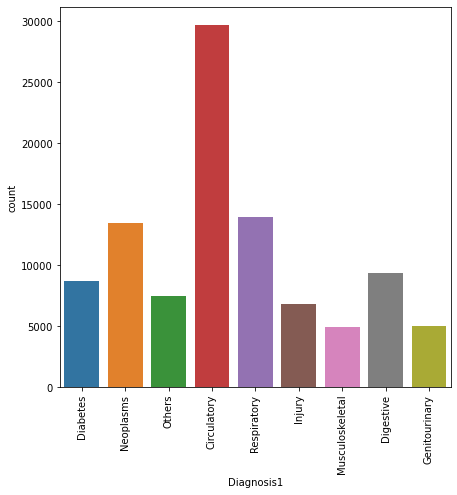

In [51]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(cat_data['Diagnosis1'])
plt.show()

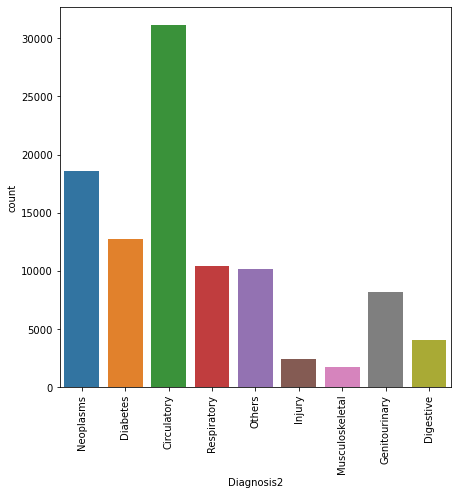

In [52]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(cat_data['Diagnosis2'])
plt.show()

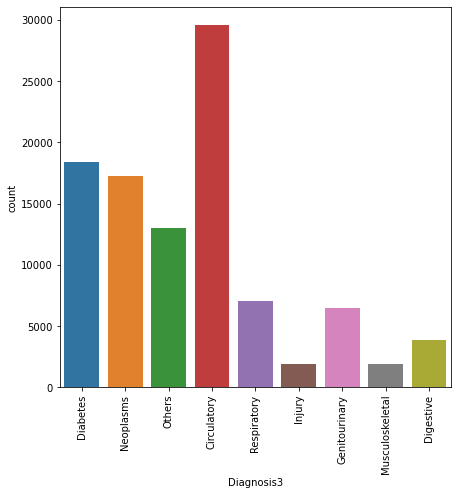

In [53]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
sns.countplot(cat_data['Diagnosis3'])
plt.show()

In [54]:
# univariate analysis for numerical column

In [55]:
num_data.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

<AxesSubplot:xlabel='time_in_hospital', ylabel='Count'>

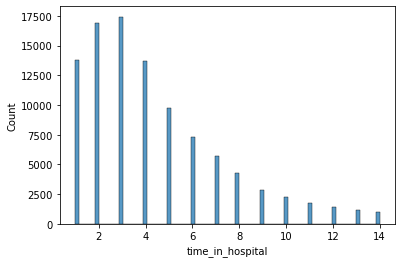

In [56]:
sns.histplot(num_data['time_in_hospital'])

<AxesSubplot:xlabel='num_lab_procedures', ylabel='Count'>

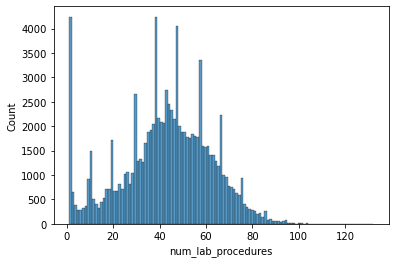

In [57]:
sns.histplot(num_data['num_lab_procedures'])

<AxesSubplot:xlabel='num_procedures', ylabel='Count'>

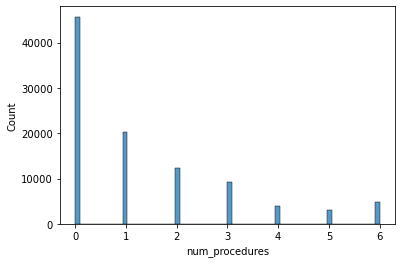

In [58]:
sns.histplot(num_data['num_procedures'])

<AxesSubplot:xlabel='number_emergency', ylabel='Count'>

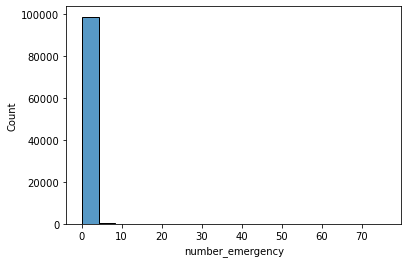

In [59]:
sns.histplot(num_data['number_emergency'])

<AxesSubplot:xlabel='number_inpatient', ylabel='Count'>

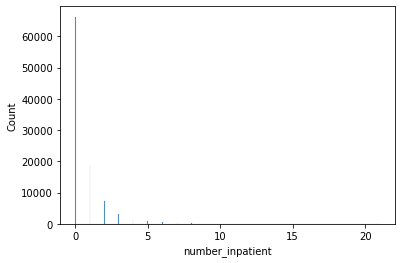

In [60]:
sns.histplot(num_data['number_inpatient'])

<AxesSubplot:xlabel='number_outpatient', ylabel='Count'>

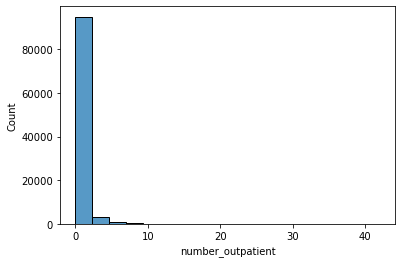

In [61]:
sns.histplot(num_data['number_outpatient'])

<AxesSubplot:xlabel='number_diagnoses', ylabel='Count'>

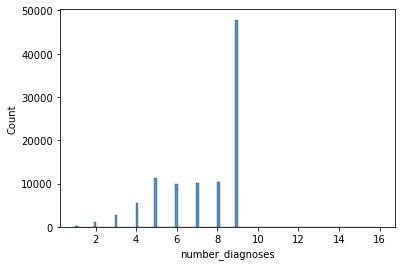

In [62]:
sns.histplot(num_data['number_diagnoses'])

In [63]:
# univaraite analysis for the target column.

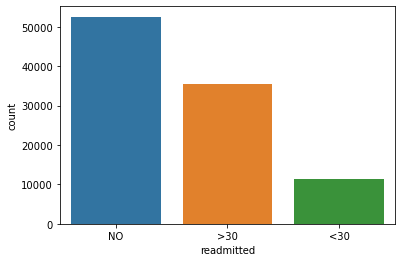

In [64]:
sns.countplot(df['readmitted'])
plt.show()

In [65]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [66]:
df['readmitted']=df['readmitted'].replace({'NO':'Not Admitted' , '>30':'Admitted' , '<30':'Admitted'})

In [67]:
df['readmitted'].unique()

array(['Not Admitted', 'Admitted'], dtype=object)

In [68]:
df['readmitted']

0         Not Admitted
1             Admitted
2         Not Admitted
3         Not Admitted
4         Not Admitted
              ...     
101761        Admitted
101762    Not Admitted
101763    Not Admitted
101764    Not Admitted
101765    Not Admitted
Name: readmitted, Length: 99337, dtype: object

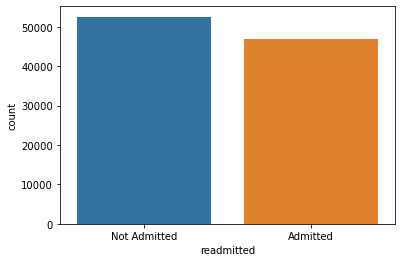

In [69]:
sns.countplot(df['readmitted'])
plt.show()

# Bivariate Analysis

In [70]:
# since df['readmitted'] is the target column we check relationship with target and independent column.

In [71]:
# bivariate analysis of target variable with numerical columns

<AxesSubplot:xlabel='readmitted', ylabel='number_diagnoses'>

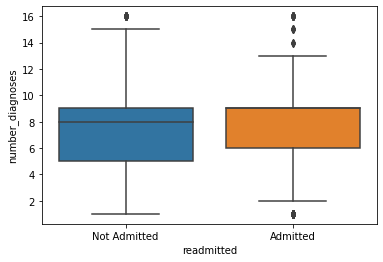

In [72]:
sns.boxplot(df['readmitted'],df['number_diagnoses'])

<AxesSubplot:xlabel='readmitted', ylabel='time_in_hospital'>

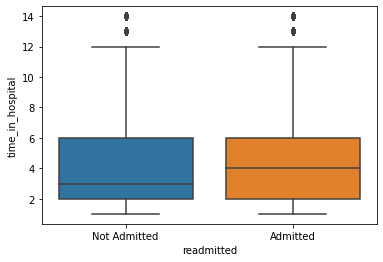

In [73]:
sns.boxplot(df['readmitted'],df['time_in_hospital'])

<AxesSubplot:xlabel='time_in_hospital', ylabel='readmitted'>

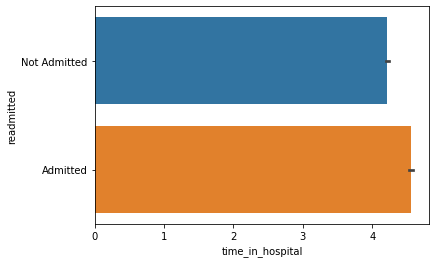

In [74]:
sns.barplot(df['time_in_hospital'],df['readmitted'])

<Figure size 648x648 with 0 Axes>

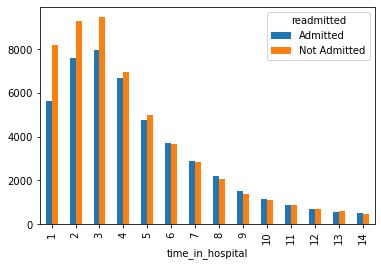

In [75]:
plt.figure(figsize=(9,9))
tab = pd.crosstab(df['time_in_hospital'],df['readmitted'])
tab.plot(kind='bar')
plt.show()

In [76]:
# bivariate analysis with categorical columns

<AxesSubplot:xlabel='race'>

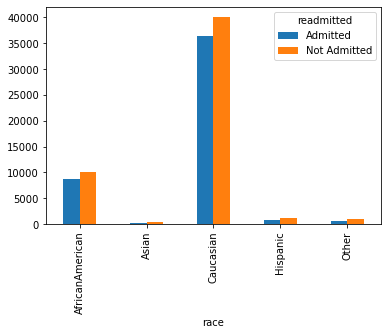

In [77]:
tab = pd.crosstab(df['race'],df['readmitted'])
tab.plot(kind='bar')

<AxesSubplot:xlabel='age'>

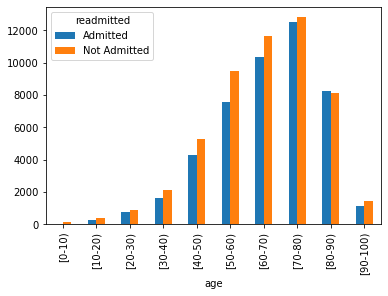

In [78]:
tab = pd.crosstab(df['age'],df['readmitted'])
tab.plot(kind='bar')

In [79]:
cat_data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Diagnosis1', 'Diagnosis2', 'Diagnosis3'],
      dtype='object')

<AxesSubplot:xlabel='gender'>

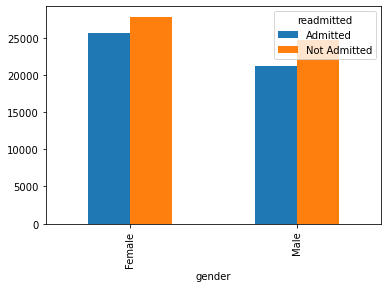

In [80]:
tab = pd.crosstab(df['gender'],df['readmitted'])
tab.plot(kind='bar')

<AxesSubplot:xlabel='admission_type_id'>

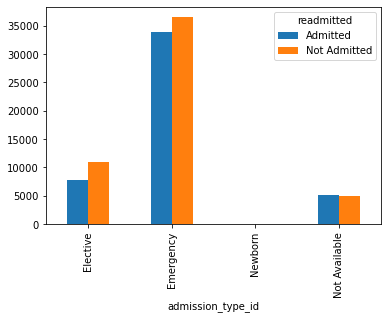

In [81]:
tab = pd.crosstab(df['admission_type_id'],df['readmitted'])
tab.plot(kind='bar')

<AxesSubplot:xlabel='discharge_disposition_id'>

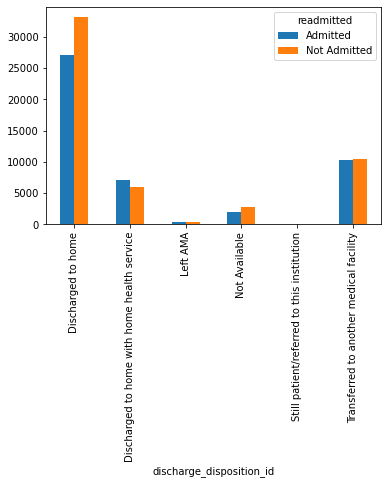

In [82]:
tab = pd.crosstab(df['discharge_disposition_id'],df['readmitted'])
tab.plot(kind='bar')

<AxesSubplot:xlabel='admission_source_id'>

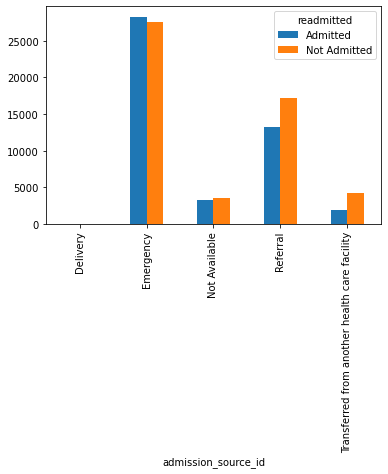

In [83]:
tab = pd.crosstab(df['admission_source_id'],df['readmitted'])
tab.plot(kind='bar')

<AxesSubplot:xlabel='Diagnosis2'>

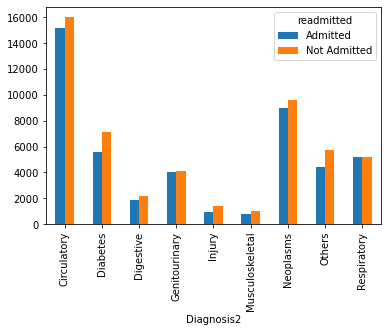

In [84]:
tab = pd.crosstab(df['Diagnosis2'],df['readmitted'])
tab.plot(kind='bar')

<AxesSubplot:xlabel='Diagnosis1'>

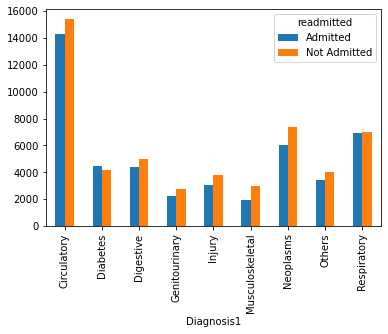

In [85]:
tab = pd.crosstab(df['Diagnosis1'],df['readmitted'])
tab.plot(kind='bar')

<AxesSubplot:xlabel='Diagnosis3'>

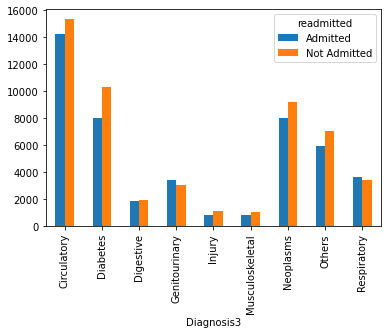

In [86]:
tab = pd.crosstab(df['Diagnosis3'],df['readmitted'])
tab.plot(kind='bar')

In [87]:
# bivariate analysis for different type medicines

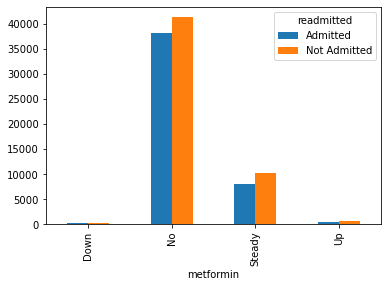

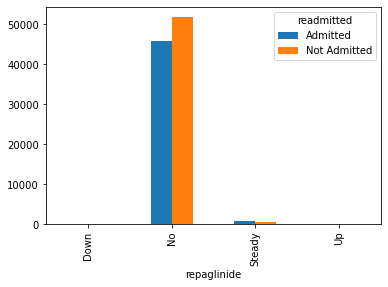

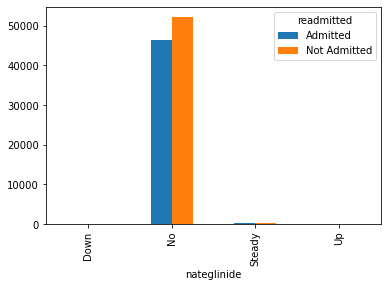

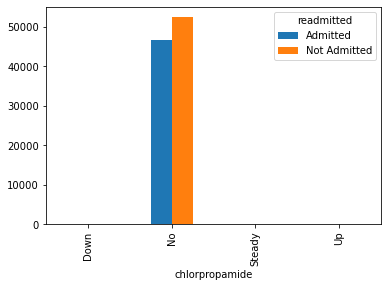

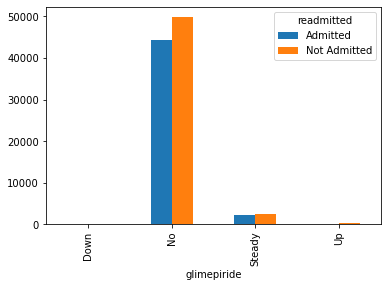

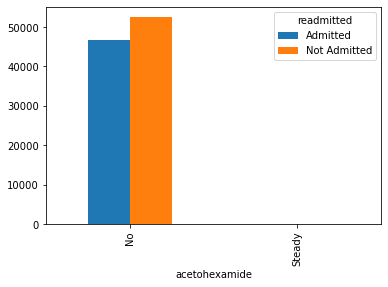

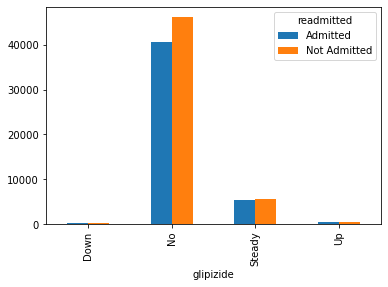

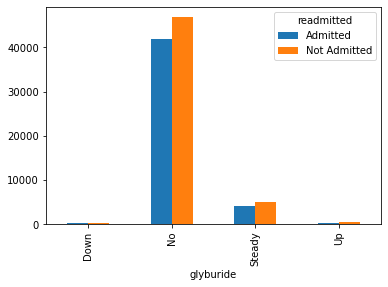

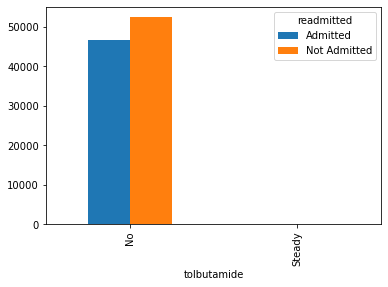

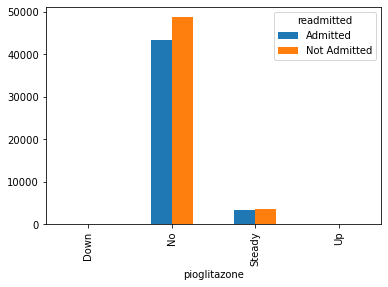

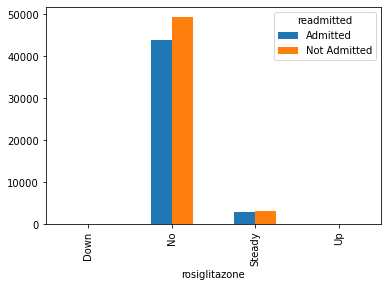

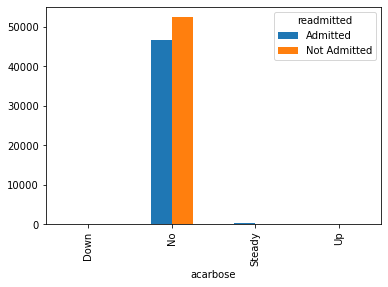

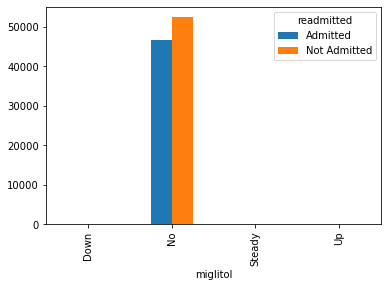

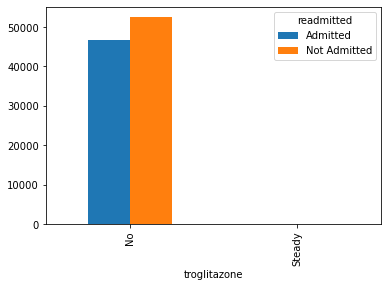

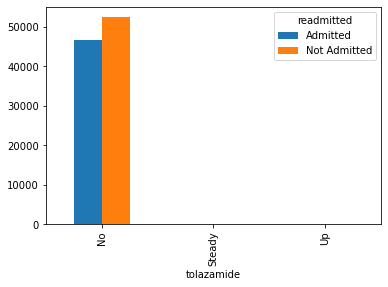

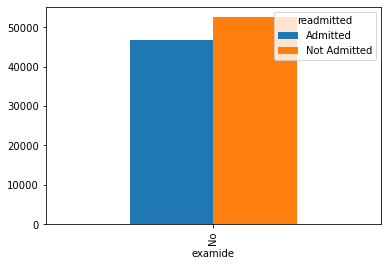

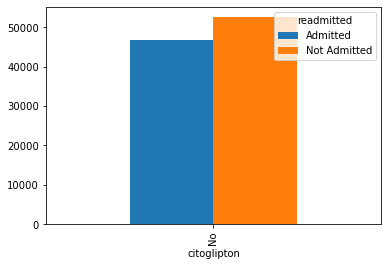

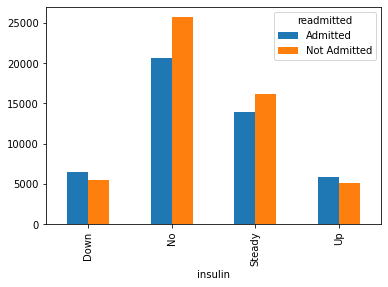

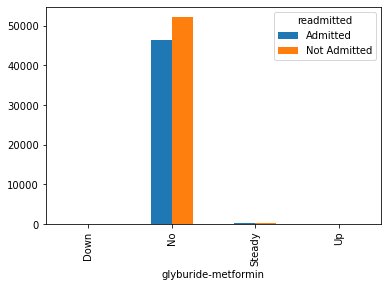

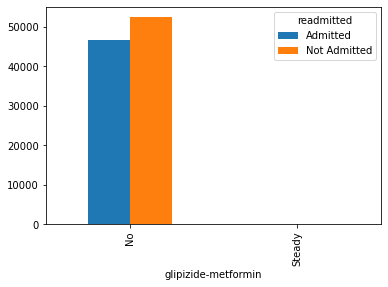

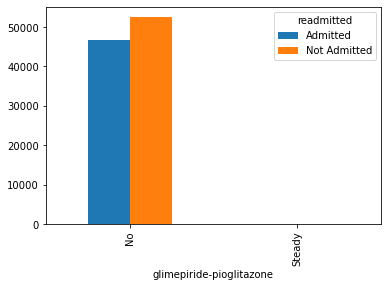

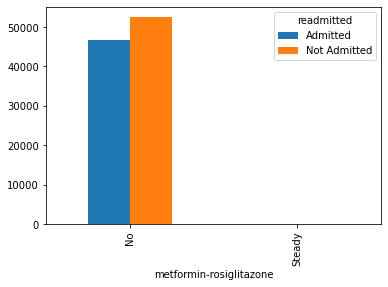

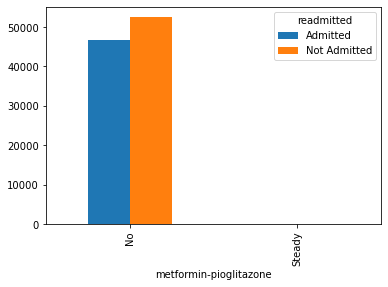

In [88]:
for i in ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]:
    pd.crosstab(df[i],df['readmitted']).plot(kind='bar')

# Multivariate Analysis

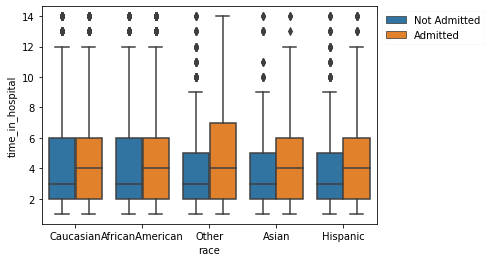

In [89]:
sns.boxplot(df['race'],df['time_in_hospital'],hue=df['readmitted'])
plt.legend(framealpha=0.1,bbox_to_anchor=(1,0,0,1))
plt.show()

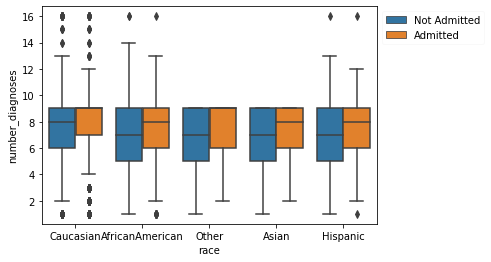

In [90]:
sns.boxplot(df['race'],df['number_diagnoses'],hue=df['readmitted'])
plt.legend(framealpha=0.1,bbox_to_anchor=(1,0,0,1))
plt.show()

In [91]:
df.drop(['examide','citoglipton'] , 1 , inplace = True)

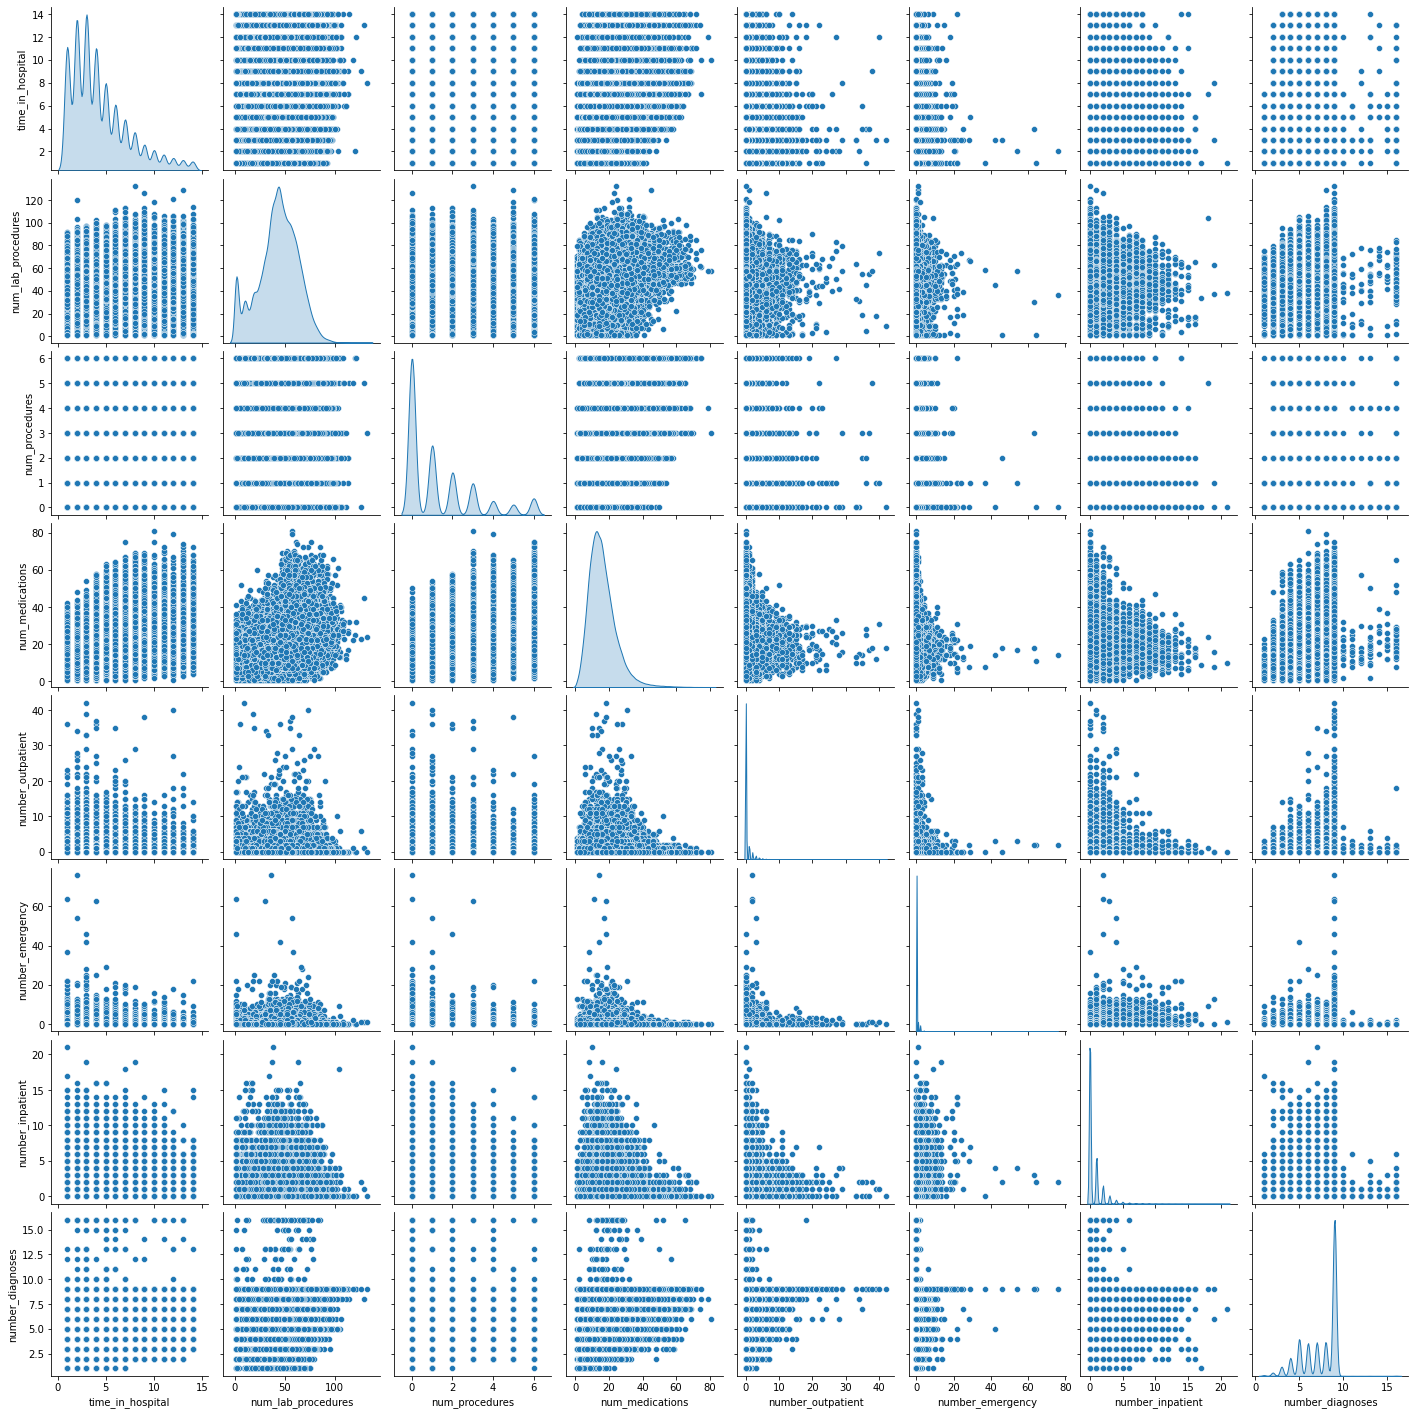

In [92]:
sns.pairplot(num_data,diag_kind='kde')
plt.show()

In [93]:
num_data.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.319847,0.189933,0.463802,-0.009204,-0.009565,0.074241,0.220663
num_lab_procedures,0.319847,1.000000,0.051736,0.265170,-0.007600,-0.000973,0.039919,0.149723
num_procedures,0.189933,0.051736,1.000000,0.381928,-0.025265,-0.038716,-0.067028,0.070461
num_medications,0.463802,0.265170,0.381928,1.000000,0.046030,0.014023,0.065273,0.261627
number_outpatient,-0.009204,-0.007600,-0.025265,0.046030,1.000000,0.091665,0.108017,0.094809
number_emergency,-0.009565,-0.000973,-0.038716,0.014023,0.091665,1.000000,0.267706,0.055978
number_inpatient,0.074241,0.039919,-0.067028,0.065273,0.108017,0.267706,1.000000,0.104738
number_diagnoses,0.220663,0.149723,0.070461,0.261627,0.094809,0.055978,0.104738,1.000000


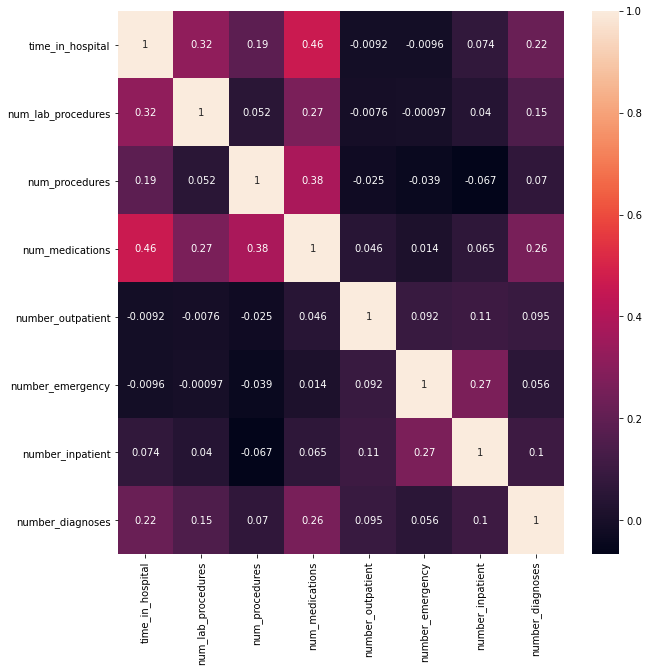

In [94]:
plt.figure(figsize=(10,10))
sns.heatmap(num_data.corr(),annot=True)
plt.show()

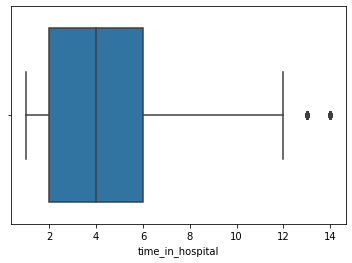

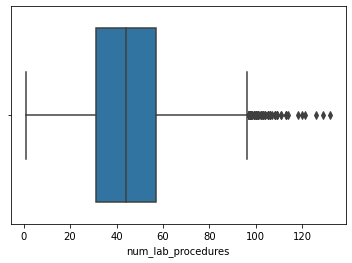

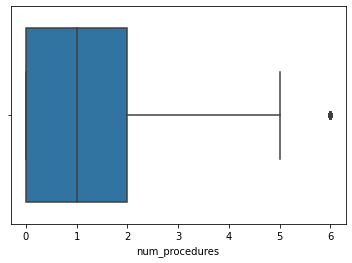

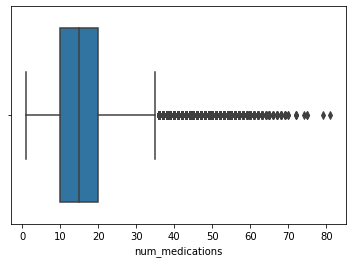

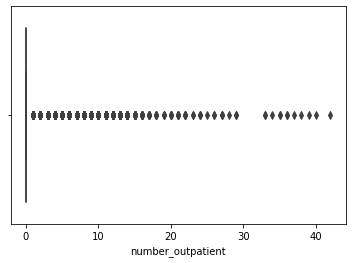

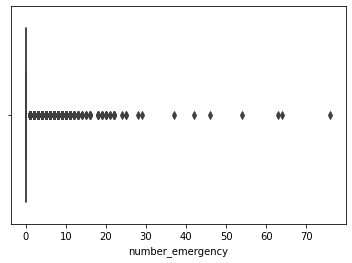

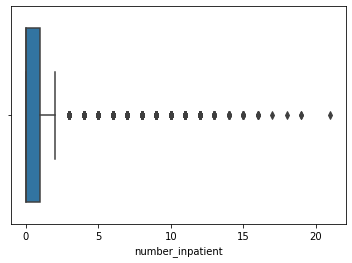

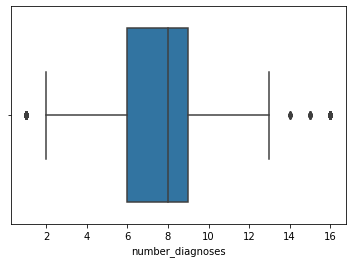

In [95]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()     
    
   

In [96]:
# since is a discrete numerical columns we need not treat the outliers 

# Encoding 

In [97]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [98]:
replacedict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

In [99]:
df['age'] = df['age'].apply(lambda x : replacedict[x])
print(df['age'])

0          5
1         15
2         25
3         35
4         45
          ..
101761    75
101762    85
101763    75
101764    85
101765    75
Name: age, Length: 99337, dtype: int64


In [100]:
df.max_glu_serum.replace({'>200':200 , '>300':300 , 'Norm':100 , 'None' : 0} , inplace = True)

In [101]:
df.A1Cresult.replace({'>7':7 , '>8':8 , 'Norm':5 , 'None':0} , inplace = True)

In [102]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diagnosis1,Diagnosis2,Diagnosis3
0,Caucasian,Female,5,Not Available,Not Available,Referral,1,41,0,1,...,No,No,No,No,No,No,Not Admitted,Diabetes,Neoplasms,Diabetes
1,Caucasian,Female,15,Emergency,Discharged to home,Emergency,3,59,0,18,...,No,No,No,No,Ch,Yes,Admitted,Neoplasms,Diabetes,Neoplasms
2,AfricanAmerican,Female,25,Emergency,Discharged to home,Emergency,2,11,5,13,...,No,No,No,No,No,Yes,Not Admitted,Others,Diabetes,Others
3,Caucasian,Male,35,Emergency,Discharged to home,Emergency,2,44,1,16,...,No,No,No,No,Ch,Yes,Not Admitted,Neoplasms,Diabetes,Circulatory
4,Caucasian,Male,45,Emergency,Discharged to home,Emergency,1,51,0,8,...,No,No,No,No,Ch,Yes,Not Admitted,Neoplasms,Neoplasms,Diabetes


In [103]:
# There are 3 types of visits to a hospital. 1) Inpatient 2) Outpatient 3) Emergency.
# Combining them into a single column
df['total_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [104]:
df.drop(['number_outpatient' , 'number_emergency','number_inpatient',] , 1 , inplace = True)

In [105]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Diagnosis1', 'Diagnosis2', 'Diagnosis3', 'total_visits'],
      dtype='object')

In [106]:
df.change.replace({'No':0,'Ch':1} , inplace = True)



In [107]:
df['change'].unique()

array([0, 1], dtype=int64)

In [108]:
df.diabetesMed.replace({'Yes':1 , 'No':0} , inplace = True)





In [109]:
df.diabetesMed.unique()

array([0, 1], dtype=int64)

In [110]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diagnosis1,Diagnosis2,Diagnosis3,total_visits
0,Caucasian,Female,5,Not Available,Not Available,Referral,1,41,0,1,...,No,No,No,0,0,Not Admitted,Diabetes,Neoplasms,Diabetes,0
1,Caucasian,Female,15,Emergency,Discharged to home,Emergency,3,59,0,18,...,No,No,No,1,1,Admitted,Neoplasms,Diabetes,Neoplasms,0
2,AfricanAmerican,Female,25,Emergency,Discharged to home,Emergency,2,11,5,13,...,No,No,No,0,1,Not Admitted,Others,Diabetes,Others,3
3,Caucasian,Male,35,Emergency,Discharged to home,Emergency,2,44,1,16,...,No,No,No,1,1,Not Admitted,Neoplasms,Diabetes,Circulatory,0
4,Caucasian,Male,45,Emergency,Discharged to home,Emergency,1,51,0,8,...,No,No,No,1,1,Not Admitted,Neoplasms,Neoplasms,Diabetes,0


In [111]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Diagnosis1', 'Diagnosis2', 'Diagnosis3', 'total_visits'],
      dtype='object')

In [112]:
df['gender']=df['gender'].replace({'Male':0,'Female':1})

In [113]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for i in meds:
       print(i, df[i].unique())

metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Up' 'Steady' 'Down']
nateglinide ['No' 'Steady' 'Down' 'Up']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up']
troglitazone ['No' 'Steady']
tolazamide ['No' 'Steady' 'Up']
insulin ['No' 'Up' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No' 'Steady']
metformin-pioglitazone ['No' 'Steady']


In [114]:
for i in meds:
    df[i] = df[i].replace({'No' : -2,
                           'Down' : -1,
                           'Steady' : 0,
                           'Up' : 1})

In [115]:
for i in meds:
       print(i, df[i].unique())

metformin [-2  0  1 -1]
repaglinide [-2  1  0 -1]
nateglinide [-2  0 -1  1]
chlorpropamide [-2  0 -1  1]
glimepiride [-2  0 -1  1]
acetohexamide [-2  0]
glipizide [-2  0  1 -1]
glyburide [-2  0  1 -1]
tolbutamide [-2  0]
pioglitazone [-2  0  1 -1]
rosiglitazone [-2  0  1 -1]
acarbose [-2  0  1 -1]
miglitol [-2  0 -1  1]
troglitazone [-2  0]
tolazamide [-2  0  1]
insulin [-2  1  0 -1]
glyburide-metformin [-2  0 -1  1]
glipizide-metformin [-2  0]
glimepiride-pioglitazone [-2  0]
metformin-rosiglitazone [-2  0]
metformin-pioglitazone [-2  0]


In [116]:
df = pd.get_dummies(df,columns=['race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone' ],drop_first=True) 
       

In [117]:
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,...,insulin_0,insulin_1,glyburide-metformin_-1,glyburide-metformin_0,glyburide-metformin_1,glipizide-metformin_0,glimepiride-pioglitazone_0,glimepiride-pioglitazone_0,metformin-rosiglitazone_0,metformin-pioglitazone_0
0,1,5,1,41,0,1,1,0,0,Not Admitted,...,0,0,0,0,0,0,0,0,0,0
1,1,15,3,59,0,18,9,1,1,Admitted,...,0,1,0,0,0,0,0,0,0,0
2,1,25,2,11,5,13,6,0,1,Not Admitted,...,0,0,0,0,0,0,0,0,0,0
3,0,35,2,44,1,16,7,1,1,Not Admitted,...,0,1,0,0,0,0,0,0,0,0
4,0,45,1,51,0,8,5,1,1,Not Admitted,...,1,0,0,0,0,0,0,0,0,0


In [118]:
df.columns

Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses', 'change',
       'diabetesMed', 'readmitted', 'Diagnosis1', 'Diagnosis2', 'Diagnosis3',
       'total_visits', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'admission_type_id_Emergency',
       'admission_type_id_Newborn', 'admission_type_id_Not Available',
       'discharge_disposition_id_Discharged to home with home health service',
       'discharge_disposition_id_Left AMA',
       'discharge_disposition_id_Not Available',
       'discharge_disposition_id_Still patient/referred to this institution',
       'discharge_disposition_id_Transferred to another medical facility',
       'admission_source_id_Emergency', 'admission_source_id_Not Available',
       'admission_source_id_Referral',
       'admission_source_id_Transferred from another health care facility',
       'max_glu_serum_100', 'max_glu_serum_200', 'max_glu_serum_300',


In [119]:
df['Diagnosis2'].unique()

array(['Neoplasms', 'Diabetes', 'Circulatory', 'Respiratory', 'Others',
       'Injury', 'Musculoskeletal', 'Genitourinary', 'Digestive'],
      dtype=object)

In [120]:
df=pd.get_dummies(df,columns=['Diagnosis2','Diagnosis1','Diagnosis3'],drop_first=True)

In [121]:
df.columns

Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses', 'change',
       'diabetesMed', 'readmitted',
       ...
       'Diagnosis1_Others', 'Diagnosis1_Respiratory', 'Diagnosis3_Diabetes',
       'Diagnosis3_Digestive', 'Diagnosis3_Genitourinary', 'Diagnosis3_Injury',
       'Diagnosis3_Musculoskeletal', 'Diagnosis3_Neoplasms',
       'Diagnosis3_Others', 'Diagnosis3_Respiratory'],
      dtype='object', length=106)

In [122]:
df['readmitted'].unique()

array(['Not Admitted', 'Admitted'], dtype=object)

In [123]:
df['readmitted']= df['readmitted'].replace( {'Not Admitted': 0, 'Admitted': 1} )

In [124]:
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,...,Diagnosis1_Others,Diagnosis1_Respiratory,Diagnosis3_Diabetes,Diagnosis3_Digestive,Diagnosis3_Genitourinary,Diagnosis3_Injury,Diagnosis3_Musculoskeletal,Diagnosis3_Neoplasms,Diagnosis3_Others,Diagnosis3_Respiratory
0,1,5,1,41,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,15,3,59,0,18,9,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2,1,25,2,11,5,13,6,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0,35,2,44,1,16,7,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,45,1,51,0,8,5,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [125]:
num_data2 = df.select_dtypes(include=np.number) 
num_data2

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,...,Diagnosis1_Others,Diagnosis1_Respiratory,Diagnosis3_Diabetes,Diagnosis3_Digestive,Diagnosis3_Genitourinary,Diagnosis3_Injury,Diagnosis3_Musculoskeletal,Diagnosis3_Neoplasms,Diagnosis3_Others,Diagnosis3_Respiratory
0,1,5,1,41,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,15,3,59,0,18,9,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2,1,25,2,11,5,13,6,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0,35,2,44,1,16,7,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,45,1,51,0,8,5,1,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,75,3,51,0,16,9,1,1,1,...,0,0,0,0,0,0,0,0,0,0
101762,1,85,5,33,3,18,9,0,1,0,...,0,0,0,1,0,0,0,0,0,0
101763,0,75,1,53,0,9,13,1,1,0,...,0,0,0,0,0,0,0,0,1,0
101764,1,85,10,45,2,21,9,1,1,0,...,0,0,0,0,0,1,0,0,0,0


# Base Model

In [126]:
X = df.drop('readmitted',1) # independent variables
y = df['readmitted']

In [127]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
dt = LogisticRegression()
dt.fit(X_train,y_train)
print("Training Accuracy")
print(dt.score(X_train,y_train))
print("Testing Accuracy")
print(dt.score(X_test,y_test))
predicted = dt.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))

Training Accuracy
0.6197762649586631
Testing Accuracy
0.6197402858868533
[[7977 2401]
 [5154 4336]]
              precision    recall  f1-score   support

           0       0.61      0.77      0.68     10378
           1       0.64      0.46      0.53      9490

    accuracy                           0.62     19868
   macro avg       0.63      0.61      0.61     19868
weighted avg       0.62      0.62      0.61     19868

0.643609915392608
0.45690200210748155
0.5344179453996426


In [128]:
X_test.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,total_visits,...,Diagnosis1_Others,Diagnosis1_Respiratory,Diagnosis3_Diabetes,Diagnosis3_Digestive,Diagnosis3_Genitourinary,Diagnosis3_Injury,Diagnosis3_Musculoskeletal,Diagnosis3_Neoplasms,Diagnosis3_Others,Diagnosis3_Respiratory
53255,1,75,13,64,0,21,9,0,1,0,...,1,0,0,0,0,0,0,0,1,0
49848,1,15,2,11,0,6,5,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4253,0,45,1,62,0,13,5,1,1,0,...,0,0,1,0,0,0,0,0,0,0
95648,1,55,3,49,1,30,9,1,1,2,...,0,1,1,0,0,0,0,0,0,0
27412,1,25,5,15,2,17,9,1,1,20,...,0,0,0,0,0,0,0,0,1,0


In [129]:
dt.predict_proba(X_test)

array([[0.47586839, 0.52413161],
       [0.64252384, 0.35747616],
       [0.57315008, 0.42684992],
       ...,
       [0.22117013, 0.77882987],
       [0.60757662, 0.39242338],
       [0.42823438, 0.57176562]])

In [130]:
dt.predict(X_test)

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [131]:
from sklearn.metrics import roc_curve, auc

In [132]:
probas1_ = dt.fit(X_train, y_train).predict_proba(X_test)

In [133]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc= auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.661756


In [134]:
import pylab as pl

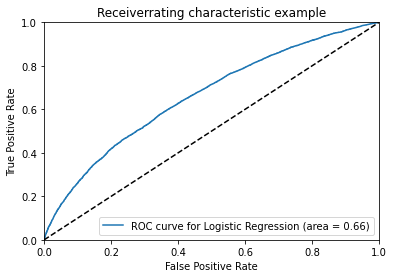

In [136]:
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for Logistic Regression (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [ ]:
# From the base Model we can infer that the model is highly underfit.

In [ ]:
# eval metric changes on domain 

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 15, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

# predict the attrition for test set
y_pred = rf_model.predict(X_test)

# generate a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63     10378
           1       0.59      0.55      0.57      9490

    accuracy                           0.60     19868
   macro avg       0.60      0.60      0.60     19868
weighted avg       0.60      0.60      0.60     19868



In [142]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 15, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

# predict the attrition for test set
y_pred = rf_model.predict(X_train)

# generate a classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42147
           1       1.00      0.99      1.00     37322

    accuracy                           1.00     79469
   macro avg       1.00      1.00      1.00     79469
weighted avg       1.00      1.00      1.00     79469



In [144]:
probas1_ = dt.fit(X_train, y_train).predict_proba(X_test)

In [145]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc= auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.661756


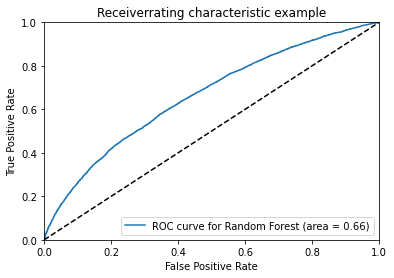

In [146]:
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for Random Forest (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()